### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# --- Análisis de facturación por Tienda ---

def calcular_facturacion_tienda(df):
    """Calcula el ingreso total de una tienda sumando los valores de la columna 'Precio'.

    Args:
        df (pd.DataFrame): DataFrame de la tienda.

    Returns:
        float: El ingreso total de la tienda, o 0 si no hay precios.
    """
    try:
        precios = df['Precio'].tolist()
        return sum(precios) if precios else 0
    except KeyError as e:
        print(f"Error: La columna '{e}' no se encuentra en el DataFrame.")
        return 0

# Calcular facturación total para cada tienda
facturacion_tienda1 = calcular_facturacion_tienda(tienda)
facturacion_tienda2 = calcular_facturacion_tienda(tienda2)
facturacion_tienda3 = calcular_facturacion_tienda(tienda3)
facturacion_tienda4 = calcular_facturacion_tienda(tienda4)

# Mostrar los resultados
print("\n--- Ingreso Total por Tienda ---")
print(f"Facturación total de la Tienda 1: ${facturacion_tienda1:,.2f}")
print(f"Factutación total de la Tienda 2: ${facturacion_tienda2:,.2f}")
print(f"Facturación total de la Tienda 3: ${facturacion_tienda3:,.2f}")
print(f"Facturación total de la Tienda 4: ${facturacion_tienda4:,.2f}")


# Facturación total de todas las tiendas
facturacion_total = facturacion_tienda1 + facturacion_tienda2 + facturacion_tienda3 + facturacion_tienda4
print(f"\nFacturación total de todas las tiendas: ${facturacion_total:,.2f}")




--- Ingreso Total por Tienda ---
Facturación total de la Tienda 1: $1,150,880,400.00
Factutación total de la Tienda 2: $1,116,343,500.00
Facturación total de la Tienda 3: $1,098,019,600.00
Facturación total de la Tienda 4: $1,038,375,700.00

Facturación total de todas las tiendas: $4,403,619,200.00


# 2. Ventas por categoría

In [ ]:
def calcular_ventas_por_categoria(df,numero):
    """Calcula la suma total de ventas (precios) por categoría de producto.

    Args:
        df (pd.DataFrame): DataFrame de la tienda.

    Returns:
        dict: Un diccionario donde las claves son las categorías y los valores son la suma total de ventas.
    """
    try:
        # Convertimos las columnas relevantes a listas de Python nativo
        categorias = df['Categoría del Producto'].tolist()
        precios = df['Precio'].tolist()
        ventas_por_categoria = {}

        for categoria, precio in zip(categorias, precios):
            if categoria in ventas_por_categoria:
                ventas_por_categoria[categoria] += precio
            else:
                ventas_por_categoria[categoria] = precio
        # print(f"\nVentas por categoría en Tienda {numero}:")
        return ventas_por_categoria

    except KeyError as e:
        print(f"Error: La columna '{e}' no se encuentra en el DataFrame.")
        return {}
    except AttributeError:
        print("Error: El objeto proporcionado no es un DataFrame válido.")
        return {}

# Mostrar ventas por categoría Tienda
print(f'Tienda 1: {calcular_ventas_por_categoria(tienda,1)}')

Tienda 1: {'Electrónicos': 429493500.0, 'Muebles': 187633700.0, 'Juguetes': 17995700.0, 'Electrodomésticos': 363685200.0, 'Artículos para el hogar': 12698400.0, 'Deportes y diversión': 39290000.0, 'Libros': 8784900.0, 'Instrumentos musicales': 91299000.0}


In [ ]:
# Obtener las 3 categorías más vendidas y el porcentaje de la facturación total que representan para cada tienda
tiendas = {'Tienda 1': tienda, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}

def obtener_top_3_categorias(df, numero):
    """
    Calcula las 3 categorías de productos más vendidas y su porcentaje de la facturación total.

    Args:
        df (pd.DataFrame): DataFrame de la tienda.
        numero (int): El número de la tienda para identificarla en la salida.

    Returns:
        None: Imprime las 3 categorías principales y su porcentaje de facturación para la tienda.
    """
    try:
        ventas_por_categoria = df.groupby('Categoría del Producto')['Precio'].sum()
        total_facturacion = ventas_por_categoria.sum()
        top_3_categorias = ventas_por_categoria.nlargest(3)

        print(f"\n--- Tienda {numero} ---")
        for categoria, ventas in top_3_categorias.items():
            porcentaje = (ventas / total_facturacion) * 100
            print(f"Categoría {categoria}: {porcentaje:.2f}% de la facturación")

    except KeyError as e:
        print(f"Error en Tienda {numero}: La columna '{e}' no se encuentra en el DataFrame.")
    except AttributeError:
        print(f"Error en Tienda {numero}: El objeto proporcionado no es un DataFrame válido.")
    except ZeroDivisionError:
        print(f"Advertencia en Tienda {numero}: No hay ventas registradas para calcular porcentajes.")

for i, (nombre_tienda, df_tienda) in enumerate(tiendas.items(), 1):
    obtener_top_3_categorias(df_tienda, i)


--- Tienda 1 ---
Categoría Electrónicos: 37.32% de la facturación
Categoría Electrodomésticos: 31.60% de la facturación
Categoría Muebles: 16.30% de la facturación

--- Tienda 2 ---
Categoría Electrónicos: 36.80% de la facturación
Categoría Electrodomésticos: 31.22% de la facturación
Categoría Muebles: 15.80% de la facturación

--- Tienda 3 ---
Categoría Electrónicos: 37.41% de la facturación
Categoría Electrodomésticos: 29.98% de la facturación
Categoría Muebles: 18.31% de la facturación

--- Tienda 4 ---
Categoría Electrónicos: 39.43% de la facturación
Categoría Electrodomésticos: 27.28% de la facturación
Categoría Muebles: 18.54% de la facturación


# 3. Calificación promedio de la tienda


In [ ]:
def calcular_valoracion_media(df):
    """Calcula la valoración promedio de los clientes.

    Args:
        df (pd.DataFrame): DataFrame de la tienda.

    Returns:
        float: La valoración promedio, o 0 si no hay valoraciones.
    """
    try:
        valoraciones = df['Calificación'].tolist()
        return sum(valoraciones) / len(valoraciones) if valoraciones else 0
    except KeyError as e:
        print(f"Error: La columna '{e}' no se encuentra en el DataFrame.")
        return 0

In [ ]:
# Imprimimos en pantalla los resukltados

print(f'Calificación promedio tienda 1: {calcular_valoracion_media(tienda):.2f}')
print(f'Calificación promedio tienda 2: {calcular_valoracion_media(tienda2):.2f}')
print(f'Calificación promedio tienda 3: {calcular_valoracion_media(tienda3):.2f}')
print(f'Calificación promedio tienda 4: {calcular_valoracion_media(tienda4):.2f}')

Calificación promedio tienda 1: 3.98
Calificación promedio tienda 2: 4.04
Calificación promedio tienda 3: 4.05
Calificación promedio tienda 4: 4.00


In [ ]:
# obtener la distribución de calificaciones por tienda

def obtener_distribucion_calificaciones(df):
    """
    Calcula la distribución de las calificaciones para una tienda.

    Args:
        df (pd.DataFrame): DataFrame de la tienda.

    Returns:
        pd.Series: Una serie que muestra la frecuencia de cada calificación (1 a 5).
                     Devuelve una serie vacía si la columna 'Calificación' no existe.
    """
    if 'Calificación' in df.columns:
        return df['Calificación'].value_counts().sort_index()
    else:
        print("Error: La columna 'Calificación' no se encuentra en el DataFrame.")
        return pd.Series()

for nombre_tienda, df_tienda in tiendas.items():
    print(f"--- Distribución de calificaciones para {nombre_tienda} ---")
    distribucion = obtener_distribucion_calificaciones(df_tienda)
    if not distribucion.empty:
        print(distribucion)
    print("\n")

--- Distribución de calificaciones para Tienda 1 ---
Calificación
1     319
2      86
3     218
4     444
5    1292
Name: count, dtype: int64


--- Distribución de calificaciones para Tienda 2 ---
Calificación
1     273
2      93
3     209
4     482
5    1302
Name: count, dtype: int64


--- Distribución de calificaciones para Tienda 3 ---
Calificación
1     297
2      79
3     193
4     434
5    1356
Name: count, dtype: int64


--- Distribución de calificaciones para Tienda 4 ---
Calificación
1     310
2      85
3     210
4     453
5    1300
Name: count, dtype: int64




# 4. Productos más y menos vendidos

In [ ]:
def identificar_top_productos_vendidos(df):
    """Identifica los 3 productos más y menos vendidos.

    Args:
        df (pd.DataFrame): DataFrame de la tienda.

    Returns:
        tuple: (top_3_mas_vendidos, top_3_menos_vendidos)
               donde cada lista contiene tuplas de (producto, cantidad).
               Devuelve listas vacías si no hay productos suficientes.
    """
    try:
        productos = df['Producto'].tolist()
        if not productos:
            return [], []

        conteo_productos = {}
        for producto in productos:
            conteo_productos[producto] = conteo_productos.get(producto, 0) + 1

        # Ordenar los productos por cantidad de ventas (descendente para más vendidos)
        mas_vendidos_ordenados = sorted(conteo_productos.items(), key=lambda item: item[1], reverse=True)

        # Ordenar los productos por cantidad de ventas (ascendente para menos vendidos)
        menos_vendidos_ordenados = sorted(conteo_productos.items(), key=lambda item: item[1])

        # Obtener los top 3 más vendidos
        top_3_mas_vendidos = mas_vendidos_ordenados[:3]

        # Obtener los top 3 menos vendidos
        top_3_menos_vendidos = menos_vendidos_ordenados[:3]

        return top_3_mas_vendidos, top_3_menos_vendidos

    except KeyError as e:
        print(f"Error: La columna '{e}' no se encuentra en el DataFrame.")
        return [], []

In [ ]:
identificar_top_productos_vendidos(tienda)

([('Microondas', 60), ('TV LED UHD 4K', 60), ('Armario', 60)],
 [('Auriculares con micrófono', 33),
  ('Celular ABXY', 33),
  ('Olla de presión', 35)])

# 5. Envío promedio por tienda

In [ ]:
def calcular_costo_envio_promedio(df):
    """
    Calcula y retorna el costo de envío promedio por transacción para una tienda.
    """
    try:
        if 'Costo de envío' in df.columns:
            return df['Costo de envío'].mean()
        else:
            print(f"Advertencia: La columna 'Costo de envío' no se encuentra en el DataFrame.")
            return None
    except AttributeError:
        print(f"Error: El objeto proporcionado no es un DataFrame válido.")
        return None


# Vizualización

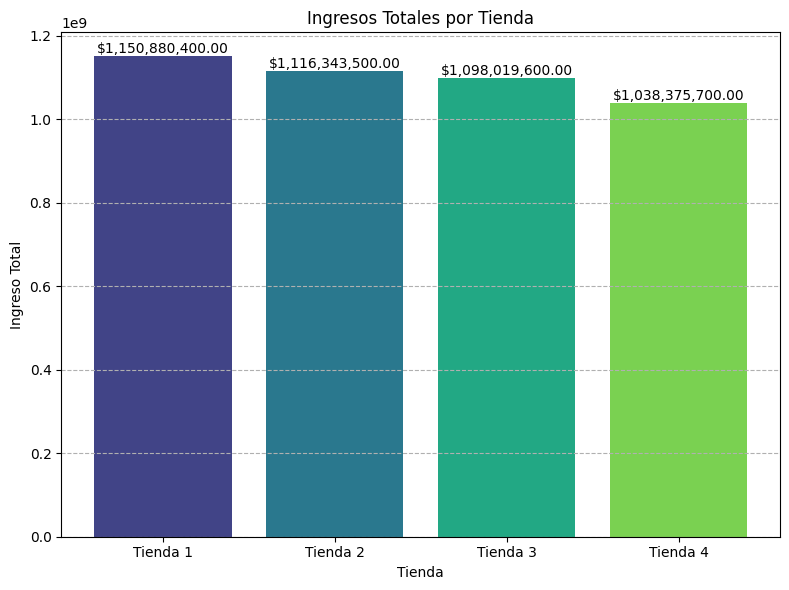

In [ ]:
# --- Generación de Gráficos ---
import matplotlib.pyplot as plt
import seaborn as sns  # Importamos seaborn para paletas de colores profesionales


# --- Recopilación de Datos para Gráficos ---

ingresos_por_tienda = {
    "Tienda 1": calcular_facturacion_tienda(tienda),
    "Tienda 2": calcular_facturacion_tienda(tienda2),
    "Tienda 3": calcular_facturacion_tienda(tienda3),
    "Tienda 4": calcular_facturacion_tienda(tienda4),
}

# 1. Gráfico de Barras: Ingresos Totales por Tienda
plt.figure(figsize=(8, 6))
nombres_tiendas = list(ingresos_por_tienda.keys())
valores_ingresos = list(ingresos_por_tienda.values())
colores_ingresos = sns.color_palette("viridis", len(nombres_tiendas)) # Paleta de colores profesional
barras = plt.bar(nombres_tiendas, valores_ingresos, color=colores_ingresos)
plt.xlabel("Tienda")
plt.ylabel("Ingreso Total")
plt.title("Ingresos Totales por Tienda")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
# plt.show()

# Agregar etiquetas al final de cada barra
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, f"${yval:,.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

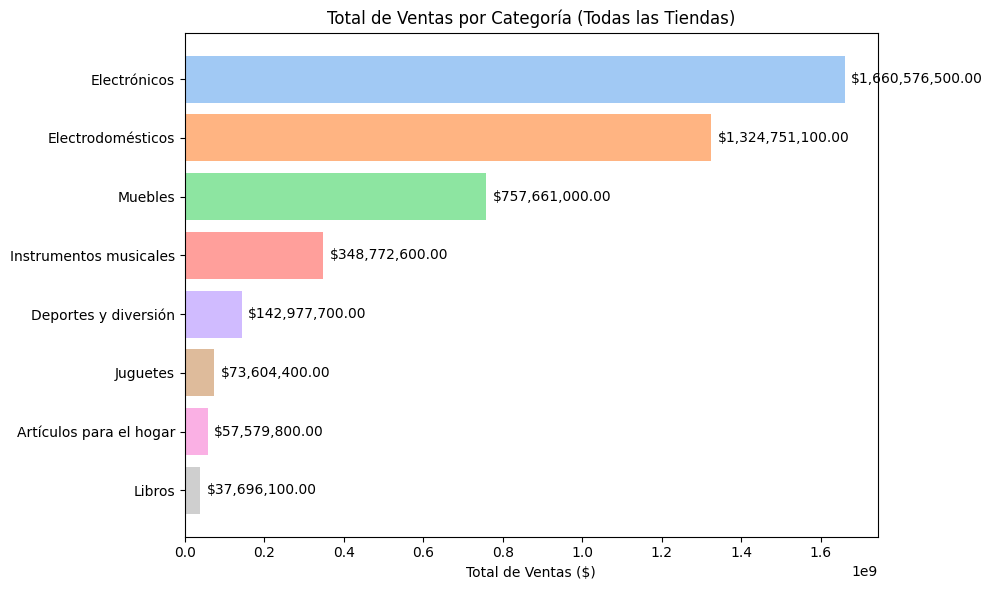

In [ ]:
# Obtener ventas por categoría para cada tienda
ventas_por_categoria_todas = [
    calcular_ventas_por_categoria(tienda, 1),
    calcular_ventas_por_categoria(tienda2, 2),
    calcular_ventas_por_categoria(tienda3, 3),
    calcular_ventas_por_categoria(tienda4, 4),
]

# Combinar las ventas por categoría en un solo diccionario
ventas_totales_por_categoria = {}

for tienda_ventas in ventas_por_categoria_todas:
    if tienda_ventas:
        for categoria, monto in tienda_ventas.items():
            if categoria in ventas_totales_por_categoria:
                ventas_totales_por_categoria[categoria] += monto
            else:
                ventas_totales_por_categoria[categoria] = monto

# Si hay datos, generar gráfico de barras horizontales
if ventas_totales_por_categoria:
    nombres_categorias = list(ventas_totales_por_categoria.keys())
    cantidades_categorias = list(ventas_totales_por_categoria.values())

    # Ordenar de mayor a menor (opcional pero más claro visualmente)
    categorias_ordenadas = sorted(
        zip(nombres_categorias, cantidades_categorias),
        key=lambda x: x[1],
        reverse=True
    )
    nombres_ordenados, cantidades_ordenadas = zip(*categorias_ordenadas)

    plt.figure(figsize=(10, 6))
    barras = plt.barh(nombres_ordenados, cantidades_ordenadas, color=sns.color_palette("pastel"))

    # Añadir etiquetas de valor al final de cada barra
    for barra in barras:
        ancho = barra.get_width()
        plt.text(ancho + max(cantidades_ordenadas)*0.01, barra.get_y() + barra.get_height()/2,
                 f"${ancho:,.2f}", va='center')

    plt.xlabel("Total de Ventas ($)")
    plt.title("Total de Ventas por Categoría (Todas las Tiendas)")
    plt.gca().invert_yaxis()  # La categoría con más ventas aparece arriba
    plt.tight_layout()
    plt.show()
else:
    print("No hay datos disponibles para generar el gráfico de barras.")


**Gráfico de Barras Agrupadas de Porcentaje de Facturación por Categoría (Comparativa entre Tiendas):**

Propósito: Comparar cómo contribuyen las principales categorías de productos a la facturación total en cada una de las tiendas. Esto nos permitirá ver si hay diferencias significativas en el enfoque de ventas por categoría entre las tiendas.

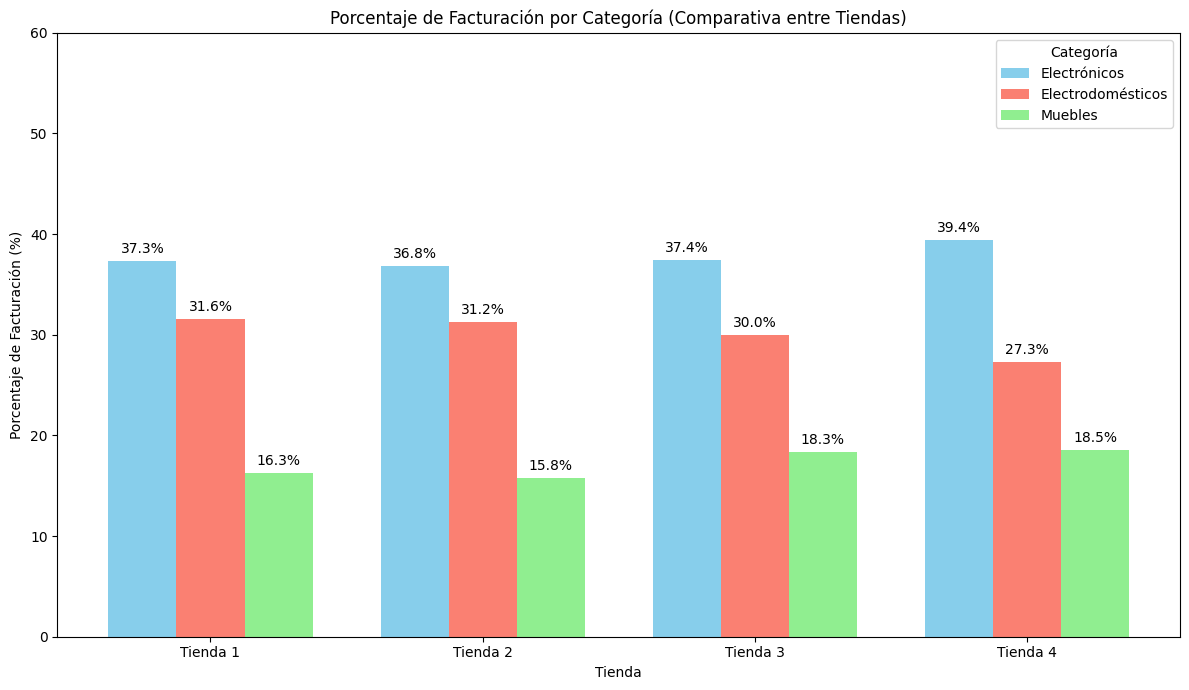

In [ ]:
# Gráfico de barras agrupadas que compare el porcentaje de facturación por categoría entre tiendas

tiendas_nombres = list(tiendas.keys())
categorias_principales = ['Electrónicos', 'Electrodomésticos', 'Muebles']
colores = ['skyblue', 'salmon', 'lightgreen']

# Calcular el porcentaje de facturación por categoría para cada tienda
porcentajes_por_tienda = {}
for nombre_tienda, df_tienda in tiendas.items():
    total_facturacion = df_tienda['Precio'].sum()
    porcentajes_categoria = {}
    for categoria in categorias_principales:
        ventas_categoria = df_tienda[df_tienda['Categoría del Producto'] == categoria]['Precio'].sum()
        porcentaje = (ventas_categoria / total_facturacion) * 100 if total_facturacion > 0 else 0
        porcentajes_categoria[categoria] = porcentaje
    porcentajes_por_tienda[nombre_tienda] = porcentajes_categoria

# Configuración del gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.25
x = range(len(tiendas_nombres))

for i, categoria in enumerate(categorias_principales):
    porcentajes = [porcentajes_por_tienda[tienda][categoria] for tienda in tiendas_nombres]
    ax.bar([pos + i * bar_width for pos in x], porcentajes, bar_width, label=categoria, color=colores[i])

# Etiquetas y título
ax.set_xlabel('Tienda')
ax.set_ylabel('Porcentaje de Facturación (%)')
ax.set_title('Porcentaje de Facturación por Categoría (Comparativa entre Tiendas)')
ax.set_xticks([pos + bar_width for pos in x])
ax.set_xticklabels(tiendas_nombres)
ax.legend(title='Categoría')
ax.set_ylim(0, 60) # El porcentaje va de 0 a 100

# Añadir etiquetas de valor en las barras
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{height:.1f}%',
                    ha='center', va='bottom')

for i in range(len(categorias_principales)):
    bars = ax.patches[i*len(tiendas_nombres):(i+1)*len(tiendas_nombres)]
    add_value_labels(bars)

plt.tight_layout()
plt.show()

Gráfico Valoración media por tienda


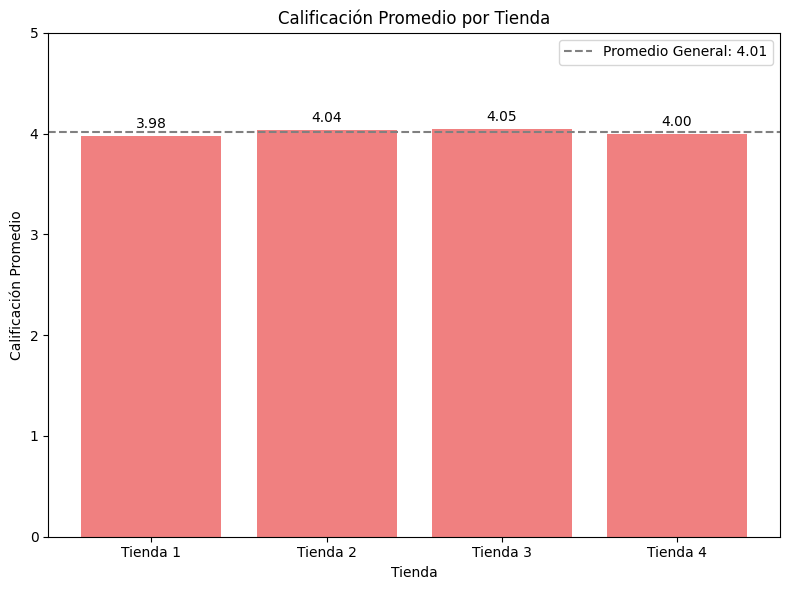

In [ ]:
tiendas = {'Tienda 1': tienda, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}
tiendas_nombres = list(tiendas.keys())
calificaciones_promedio = []

for df_tienda in tiendas.values():
    calificacion_promedio = calcular_valoracion_media(df_tienda)
    calificaciones_promedio.append(calificacion_promedio)

# Calcular la calificación promedio general
calificacion_promedio_general = sum(calificaciones_promedio) / len(calificaciones_promedio)

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(tiendas_nombres, calificaciones_promedio, color='lightcoral')

# Etiquetas y título
ax.set_xlabel('Tienda')
ax.set_ylabel('Calificación Promedio')
ax.set_title('Calificación Promedio por Tienda')
ax.set_ylim(0, 5)  # Asumiendo una escala de calificación de 1 a 5

# Línea horizontal para la calificación promedio general
ax.axhline(calificacion_promedio_general, color='gray', linestyle='--', label=f'Promedio General: {calificacion_promedio_general:.2f}')
ax.legend()

# Etiquetas de valor en las barras
def add_value_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05,
                 f'{yval:.2f}', ha='center', va='bottom')

add_value_labels(bars)

plt.tight_layout()
plt.show()



Top 3 productos mas vendidos por tienda


Tienda 1: Producto
Iphone 15         8.506722
Refrigerador      9.744132
TV LED UHD 4K    12.351431
Name: Precio, dtype: float64


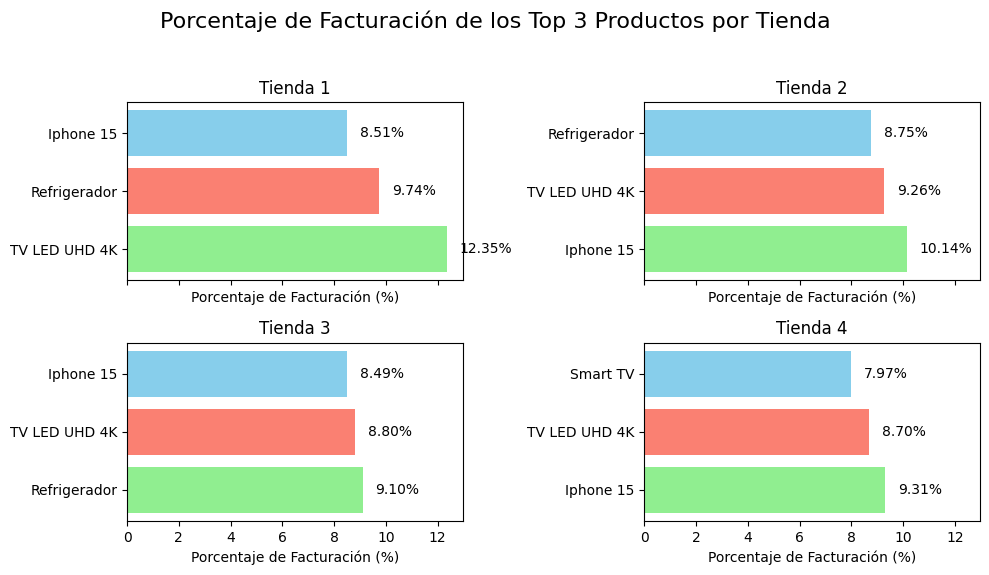

In [ ]:
tiendas = {'Tienda 1': tienda, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}
tiendas_nombres = list(tiendas.keys())
colores = ['skyblue', 'salmon', 'lightgreen'] # Colores para los 3 productos

def obtener_top_3_productos_facturacion_con_porcentaje(df):
    """
    Calcula los 3 productos individuales que generan la mayor facturación y su porcentaje del total.

    Args:
        df (pd.DataFrame): DataFrame de la tienda.

    Returns:
        pd.Series: Una serie con los 3 productos principales y su porcentaje de facturación.
                   Retorna una serie vacía si hay errores o no hay datos suficientes.
    """
    try:
        facturacion_por_producto = df.groupby('Producto')['Precio'].sum()
        total_facturacion = facturacion_por_producto.sum()
        top_3_productos = facturacion_por_producto.nlargest(3)
        porcentajes = (top_3_productos / total_facturacion) * 100 if total_facturacion > 0 else pd.Series()
        return porcentajes.sort_values(ascending=True) # Ordenar para la visualización
    except KeyError as e:
        print(f"Error: La columna '{e}' no se encuentra en el DataFrame.")
        return pd.Series()
    except AttributeError:
        print("Error: El objeto proporcionado no es un DataFrame válido.")
        return pd.Series()

print(f'Tienda 1: {obtener_top_3_productos_facturacion_con_porcentaje(tienda)}')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6), sharex=True)
axes = axes.flatten() # Para iterar fácilmente por los subplots

for i, (nombre_tienda, df_tienda) in enumerate(tiendas.items()):
    top_productos_porcentaje = obtener_top_3_productos_facturacion_con_porcentaje(df_tienda)
    ax = axes[i]
    y_pos = range(len(top_productos_porcentaje))
    ax.barh(y_pos, top_productos_porcentaje.values, color=colores[:len(top_productos_porcentaje)])
    ax.set_yticks(y_pos)
    ax.set_yticklabels(top_productos_porcentaje.index)
    ax.set_xlabel('Porcentaje de Facturación (%)')
    ax.set_title(f'{nombre_tienda}')
    ax.invert_yaxis() # Para mostrar el producto con mayor porcentaje arriba

    # Añadir etiquetas con el porcentaje exacto
    for bar, porcentaje in zip(ax.patches, top_productos_porcentaje.values):
        ax.text(porcentaje + 0.5, bar.get_y() + bar.get_height()/2, f'{porcentaje:.2f}%',
                va='center', ha='left')

fig.suptitle('Porcentaje de Facturación de los Top 3 Productos por Tienda', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar para el título principal
plt.show()


Gráfico de Barras: Valor del Envío Promedio por Tienda

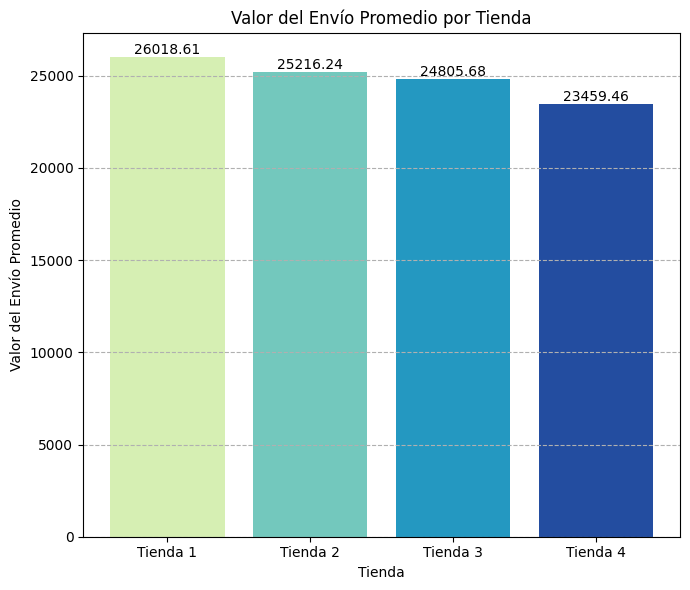

In [ ]:
envio_promedio_por_tienda = {
    "Tienda 1": calcular_costo_envio_promedio(tienda),
    "Tienda 2": calcular_costo_envio_promedio(tienda2,),
    "Tienda 3": calcular_costo_envio_promedio(tienda3),
    "Tienda 4": calcular_costo_envio_promedio(tienda4),
}

# 6. Gráfico de Barras: Valor del Envío Promedio por Tienda
plt.figure(figsize=(7, 6))
nombres_tiendas_envio = list(envio_promedio_por_tienda.keys())
valores_envio_promedio = list(envio_promedio_por_tienda.values())
colores_envio = sns.color_palette("YlGnBu", len(nombres_tiendas_envio)) # Paleta de verdes y azules
bars_venvio = plt.bar(nombres_tiendas_envio, valores_envio_promedio, color=colores_envio)
plt.xlabel("Tienda")
plt.ylabel("Valor del Envío Promedio")
plt.title("Valor del Envío Promedio por Tienda")
plt.grid(axis='y', linestyle='--')



# Etiquetas de valor en las barras
def add_value_labels_envio(bars_venvio):
    for bar in bars_venvio:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05,
                 f'{yval:.2f}', ha='center', va='bottom')

add_value_labels_envio(bars_venvio)

plt.tight_layout()
plt.show()